In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

In [3]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
X_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
# sample

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
train['comment_text'].isnull().sum()

0

In [8]:
labels = ['malignant','highly_malignant','loathe','rude','abuse','threat']
for label in labels:
    print(label)
    print(train[label].value_counts().to_string())

malignant
malignant
0    144277
1     15294
highly_malignant
highly_malignant
0    157976
1      1595
loathe
loathe
0    158166
1      1405
rude
rude
0    151122
1      8449
abuse
abuse
0    151694
1      7877
threat
threat
0    159093
1       478


In [9]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from keras.preprocessing.text import Tokenizer
from nltk.stem import SnowballStemmer, LancasterStemmer, PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from keras.preprocessing import sequence
from keras.utils import pad_sequences

import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
from nltk.corpus import words

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
data = train['comment_text'][0]
tokens = word_tokenize(data.lower())
print('Before tokenizing')
print(data)
print()
print('After tokenizing')
print(tokens)

new_tokens_porter = []
porter = PorterStemmer()
for token in tokens:
    new_tokens_porter.append(porter.stem(token))
print()
print('After porter stemmer')
print(new_tokens_porter)

new_tokens_porter = []
porter = PorterStemmer()
for token in tokens:
    new_tokens_porter.append(porter.stem(token))
print()
print('After porter stemmer')
print(new_tokens_porter)

new_tokens_snowball = []
snowball = SnowballStemmer(language='english')
for token in tokens:
    new_tokens_snowball.append(snowball.stem(token))
print()
print('After snowball stemmer')
print(new_tokens_snowball)

new_tokens_lancaster = []
lancaster = LancasterStemmer()
for token in tokens:
    new_tokens_lancaster.append(lancaster.stem(token))
print()
print('After lancaster stemmer')
print(new_tokens_lancaster)
# stemming does not refer to the root of the word

# Trying lemmatization
def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

new_tokens_lemmatizer = []
lemmatizer = WordNetLemmatizer()
for token in tokens:
    new_tokens_lemmatizer.append(lemmatizer.lemmatize(token, get_pos(token)))
print()
print('After wordnet lemmatizer')
print(new_tokens_lemmatizer)

Before tokenizing
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

After tokenizing
['explanation', 'why', 'the', 'edits', 'made', 'under', 'my', 'username', 'hardcore', 'metallica', 'fan', 'were', 'reverted', '?', 'they', 'were', "n't", 'vandalisms', ',', 'just', 'closure', 'on', 'some', 'gas', 'after', 'i', 'voted', 'at', 'new', 'york', 'dolls', 'fac', '.', 'and', 'please', 'do', "n't", 'remove', 'the', 'template', 'from', 'the', 'talk', 'page', 'since', 'i', "'m", 'retired', 'now.89.205.38.27']

After porter stemmer
['explan', 'whi', 'the', 'edit', 'made', 'under', 'my', 'usernam', 'hardcor', 'metallica', 'fan', 'were', 'revert', '?', 'they', 'were', "n't", 'vandal', ',', 'just', 'closur', 'on', 'some', 'ga', 'after', 'i', 'vote', 'at', 'new', 'york', 'doll', 'fac', '.'

In [11]:
train.drop('id', axis=1, inplace=True)
train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [12]:
X_lstm = train.drop(labels,axis=1).to_numpy().reshape(-1,)
Y_lstm = train[labels].to_numpy()

In [13]:
from sklearn.model_selection import train_test_split
X_train_lstm, X_test, y_train_dev, y_test = train_test_split(X_lstm, Y_lstm,
                                                    test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train_lstm, y_train_dev,
                                                    test_size=0.2)

In [14]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_lstm)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix_train = pad_sequences(sequences,maxlen=max_len)
sequences = tok.texts_to_sequences(X_test)
sequences_matrix_test = pad_sequences(sequences,maxlen=max_len)
sequences = tok.texts_to_sequences(X_val)
sequences_matrix_val = pad_sequences(sequences,maxlen=max_len)
sequences = tok.texts_to_sequences(X_lstm)
sequences_matrix_big = pad_sequences(sequences,maxlen=max_len)

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Embedding(max_words,50,input_length=max_len, input_shape=[max_len]))
model.add(layers.LSTM(64, dropout=0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 97,622
Trainable params: 97,622
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(sequences_matrix_train,
                    y_train,
                    epochs=1,
                    batch_size=512,
                    validation_data=(sequences_matrix_val, y_val))

200/200 [==============================] - 97s 467ms/step - loss: 0.1690 - accuracy: 0.9753 - val_loss: 0.1438 - val_accuracy: 0.9937


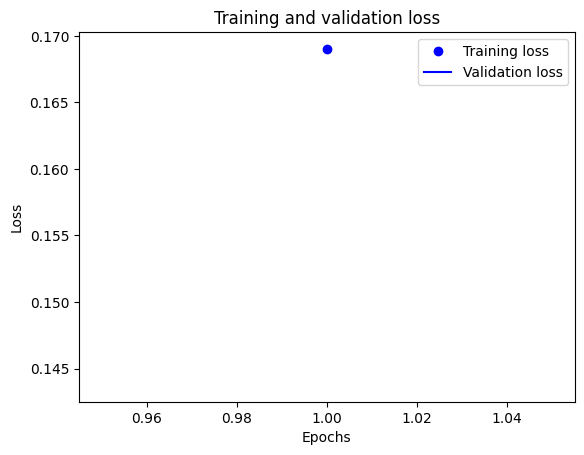

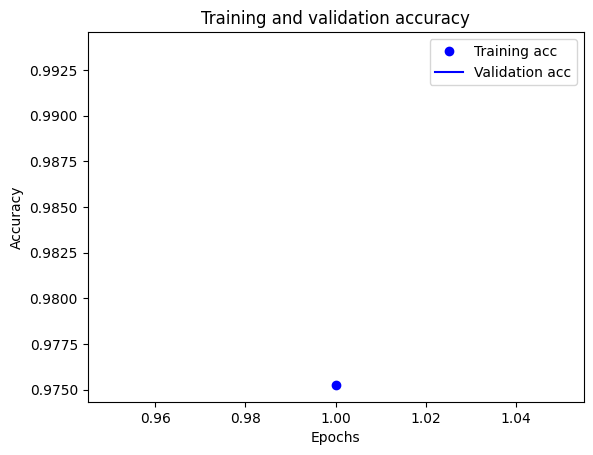

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
results = model.evaluate(sequences_matrix_test, y_test)


998/998 [==============================] - 17s 17ms/step - loss: 0.1430 - accuracy: 0.9948


In [20]:
from tensorflow.keras.callbacks import History
model = models.Sequential()
model.add(layers.Embedding(max_words,50,input_length=max_len, input_shape=[max_len]))
model.add(layers.LSTM(64, dropout=0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = History()
model.fit(sequences_matrix_big,
                    Y_lstm,
                    epochs=2,
                    batch_size=512,
                    validation_data=(sequences_matrix_val, y_val),callbacks=[history])

Epoch 1/2
312/312 [==============================] - 148s 469ms/step - loss: 0.1504 - accuracy: 0.9621 - val_loss: 0.1012 - val_accuracy: 0.9937
Epoch 2/2
312/312 [==============================] - 147s 472ms/step - loss: 0.0849 - accuracy: 0.9942 - val_loss: 0.0693 - val_accuracy: 0.9937


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


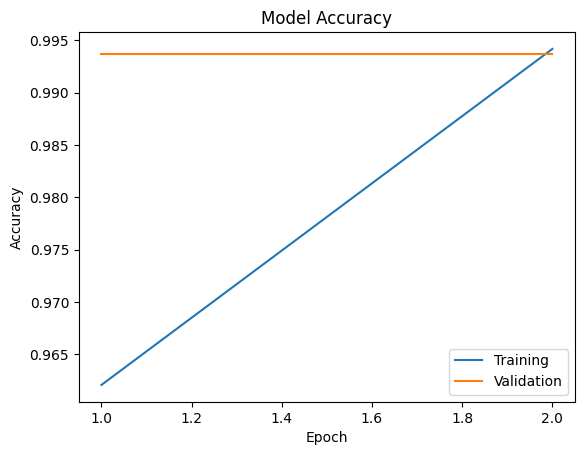

In [21]:
print(history.history.keys())
plt.plot(np.arange(1, len(history.history['accuracy'])+1), history.history['accuracy'], label='Training')
plt.plot(np.arange(1, len(history.history['val_accuracy'])+1), history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

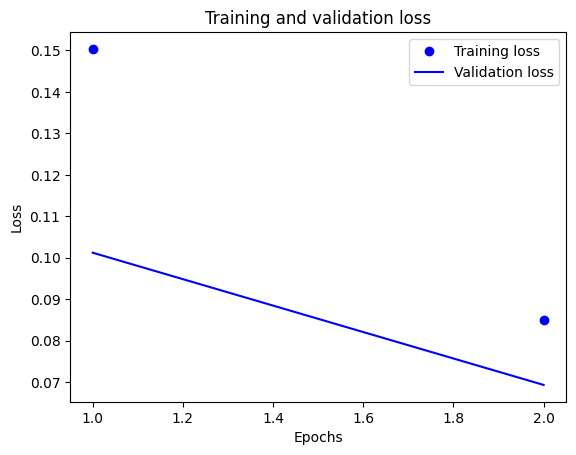

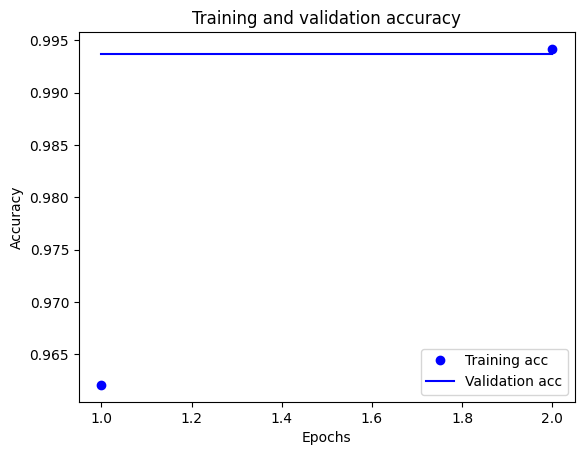

998/998 [==============================] - 17s 17ms/step - loss: 0.0690 - accuracy: 0.9948


[0.06901424378156662, 0.9947986602783203]

In [22]:
acc = history.history['accuracy']
val_acc_values = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

model.evaluate(sequences_matrix_test, y_test)


In [23]:
X_test = pd.read_csv("test.csv")
X_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [24]:
id_col = X_test['id']
test = X_test.drop('id', axis=1).to_numpy().reshape(-1,)
sequences = tok.texts_to_sequences(test)
sequences_matrix_test_final = pad_sequences(sequences,maxlen=max_len)
y_pred = model.predict(sequences_matrix_test_final)
y_pred

4787/4787 [==============================] - 84s 18ms/step


array([[8.4051859e-01, 3.5161343e-01, 2.6579142e-01, 7.1040523e-01,
        6.6182661e-01, 1.7669776e-01],
       [1.9757265e-02, 2.7539436e-04, 1.2398385e-03, 4.3582856e-03,
        5.7318145e-03, 4.6013217e-04],
       [2.6150057e-02, 4.4760702e-04, 1.6412577e-03, 6.4093214e-03,
        8.2944101e-03, 5.7869876e-04],
       ...,
       [8.1224106e-03, 8.7112283e-05, 5.3203024e-04, 1.6665695e-03,
        2.2633346e-03, 1.9912237e-04],
       [1.0834846e-02, 1.3007064e-04, 7.0712669e-04, 2.2933555e-03,
        3.1057529e-03, 2.7078029e-04],
       [1.5902497e-01, 5.4985103e-03, 1.3481340e-02, 4.6394147e-02,
        5.2539211e-02, 6.5204427e-03]], dtype=float32)

In [25]:
prediction_df = pd.DataFrame()
prediction_df['id'] = id_col
prediction_df[labels] = y_pred
prediction_df

,id,malignant,highly_malignant,loathe,rude,abuse,threat
0,00001cee341fdb12,0.840519,0.351613,0.265791,0.710405,0.661827,0.176698
1,0000247867823ef7,0.019757,0.000275,0.001240,0.004358,0.005732,0.000460
2,00013b17ad220c46,0.026150,0.000448,0.001641,0.006409,0.008294,0.000579
3,00017563c3f7919a,0.010985,0.000130,0.000738,0.002306,0.003071,0.000284
4,00017695ad8997eb,0.032132,0.000568,0.002100,0.007750,0.010018,0.000760
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.050964,0.001013,0.003276,0.012925,0.016269,0.001232
153160,fffd7a9a6eb32c16,0.022991,0.000340,0.001548,0.005070,0.006421,0.000644
153161,fffda9e8d6fafa9e,0.008122,0.000087,0.000532,0.001667,0.002263,0.000199
153162,fffe8f1340a79fc2,0.010835,0.000130,0.000707,0.002293,0.003106,0.000271


In [26]:
prediction_df.to_csv('submission.csv', index=False)